<a href="https://colab.research.google.com/github/Fabian-LG/RedNeuronal-prediccion/blob/main/RedNeuronalPrediccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Red neuronal secuencial
from tensorflow.keras.models import Sequential
#Capa completamente conectada
from tensorflow.keras.layers import Dense, Normalization
#Optimizador
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score

In [ ]:
"""data = pd.read_csv('data5.csv', encoding='unicode_escape')
data.columns = ['Estanque', 'Hectareas', 'tC_am', 'tC_pm','O2_am', 'O2_pm', 'Dias_cultivo', 'Dia_anio', 'Total']
df = pd.DataFrame(data)
df"""

"data = pd.read_csv('data5.csv', encoding='unicode_escape')\ndata.columns = ['Estanque', 'Hectareas', 'tC_am', 'tC_pm','O2_am', 'O2_pm', 'Dias_cultivo', 'Dia_anio', 'Total']\ndf = pd.DataFrame(data)\ndf"

In [ ]:
data = pd.read_csv('data.csv', encoding='unicode_escape')
data.columns = ['Estanque', 'Hectareas', 'tC_am', 'tC_pm','O2_am', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']
df = pd.DataFrame(data)

df = df.loc[:,['Estanque', 'Hectareas', 'tC_am', 'O2_am', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']]
#df = df.loc[:,['Estanque', 'Hectareas', 'tC_pm', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']]
#4 df = df.loc[:,['Estanque', 'Hectareas', 'tC_am', 'O2_am', 'Dias_cultivo', 'Dia_anio', 'Total']]
#5 df = df.loc[:,['Estanque', 'Hectareas', 'tC_pm', 'O2_pm', 'Dias_cultivo', 'Dia_anio', 'Total']]
#6 df = df.loc[:, ['Estanque', 'Hectareas', 'tC_am', 'tC_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']]
#7 df = df.loc[:,['Estanque', 'Hectareas', 'tC_am', 'tC_pm', 'Dias_cultivo', 'Dia_anio', 'Total']]

#8 df = df.loc[:,['Estanque', 'Hectareas', 'tC_am', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']]

#9 df = df.loc[:,['Estanque', 'Hectareas', 'tC_am', 'Dias_cultivo', 'Dia_anio', 'Total']]
#10 df = df.loc[:,['Estanque', 'Hectareas', 'tC_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']]
#11 df = df.loc[:,['Estanque', 'Hectareas', 'tC_pm', 'Dias_cultivo', 'Dia_anio', 'Total']]
#12 df = df.loc[:,['Estanque', 'Hectareas', 'O2_am', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']]
#13 df = df.loc[:,['Estanque', 'Hectareas', 'O2_am', 'O2_pm', 'Dias_cultivo', 'Dia_anio', 'Total']]
#14 df = df.loc[:,['Estanque', 'Hectareas', 'O2_am', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']]
#15 df = df.loc[:,['Estanque', 'Hectareas', 'O2_am', 'Dias_cultivo', 'Dia_anio', 'Total']]
#16 df = df.loc[:,['Estanque', 'Hectareas', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']]
#17 df = df.loc[:,['Estanque', 'Hectareas', 'O2_pm', 'Dias_cultivo', 'Dia_anio', 'Total']]
#18 df = df.loc[:,['Estanque', 'Hectareas', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']]
#19 df = df.loc[25:3700,['Estanque', 'Hectareas', 'Dias_cultivo', 'Dia_anio', 'Total']]

df

,Estanque,Hectareas,tC_am,O2_am,Biomasa,Dias_cultivo,Dia_anio,Total
0,1,6,NaN,NaN,NaN,6,102,25.00
1,2,6,NaN,NaN,NaN,6,102,25.00
2,3,6,NaN,NaN,NaN,6,102,25.00
3,4,6,NaN,NaN,NaN,6,102,25.00
4,5,6,NaN,NaN,NaN,6,102,25.00
...,...,...,...,...,...,...,...,...
4355,6,6,20.7,4.8,NaN,209,305,126.32
4356,7,6,20.6,4.5,NaN,209,305,125.55
4357,10,6,20.8,4.7,NaN,209,305,125.51
4358,18,6,21.2,4.8,NaN,209,305,127.03


In [ ]:
df = df.dropna()
df

,Estanque,Hectareas,tC_am,O2_am,Biomasa,Dias_cultivo,Dia_anio,Total
285,1,6,21.5,5.0,528.0,18,114,75.00
286,2,6,21.8,4.9,424.0,18,114,75.00
287,3,6,21.5,4.7,444.0,18,114,75.00
288,4,6,21.7,5.2,487.0,18,114,75.00
289,5,6,21.9,5.0,464.0,18,114,75.00
...,...,...,...,...,...,...,...,...
2410,20,6,31.3,4.2,14392.0,108,204,376.25
2411,21,6,31.2,4.3,15090.0,108,204,302.19
2412,22,6,31.3,3.9,14735.0,108,204,402.32
2413,23,6,31.3,4.1,14872.0,108,204,352.13


In [ ]:
scaler = MinMaxScaler().fit(df)
scaler

MinMaxScaler()

In [ ]:
scaler.data_min_

array([  1. ,   5. ,  20.1,   0.6, 197. ,  18. , 114. ,  50. ])

In [ ]:
scaler.data_max_

array([2.4000e+01, 7.0000e+00, 3.2200e+01, 6.4000e+00, 1.7701e+04,
       1.0800e+02, 2.0400e+02, 5.7595e+02])

In [ ]:
df.describe()

,Estanque,Hectareas,tC_am,O2_am,Biomasa,Dias_cultivo,Dia_anio,Total
count,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000
mean,12.464734,6.041063,27.192995,3.797768,8144.254589,62.300966,158.300966,277.888213
std,6.934163,0.348656,2.875120,1.006018,4780.612976,26.553115,26.553115,141.541084
min,1.000000,5.000000,20.100000,0.600000,197.000000,18.000000,114.000000,50.000000
25%,6.000000,6.000000,24.800000,3.100000,3820.000000,39.000000,135.000000,150.000000
50%,12.000000,6.000000,27.600000,3.800000,8310.500000,62.000000,158.000000,275.000000
75%,18.000000,6.000000,29.800000,4.600000,12441.000000,85.000000,181.000000,402.532500
max,24.000000,7.000000,32.200000,6.400000,17701.000000,108.000000,204.000000,575.950000


In [ ]:
scaler.feature_range

(0, 1)

In [ ]:
data_norm = scaler.transform(df)
data_norm

array([[0.        , 0.5       , 0.11570248, ..., 0.        , 0.        ,
        0.04753304],
       [0.04347826, 0.5       , 0.14049587, ..., 0.        , 0.        ,
        0.04753304],
       [0.08695652, 0.5       , 0.11570248, ..., 0.        , 0.        ,
        0.04753304],
       ...,
       [0.91304348, 0.5       , 0.92561983, ..., 1.        , 1.        ,
        0.66987356],
       [0.95652174, 0.5       , 0.92561983, ..., 1.        , 1.        ,
        0.57444624],
       [1.        , 0.        , 0.89256198, ..., 1.        , 1.        ,
        0.28795513]])

In [ ]:
#1 data_norm_df = pd.DataFrame(data_norm, columns=['Estanque', 'Hectareas', 'tC_am', 'tC_pm','O2_am', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total'])
data_norm_df = pd.DataFrame(data_norm, columns=['Estanque', 'Hectareas', 'tC_am', 'O2_am', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total'])
#3 data_norm_df = pd.DataFrame(data_norm, columns=['Estanque', 'Hectareas', 'tC_pm', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total'])
#4 data_norm_df = pd.DataFrame(data_norm, columns=['Estanque', 'Hectareas', 'tC_am', 'O2_am', 'Dias_cultivo', 'Dia_anio', 'Total'])
#5 data_norm_df = pd.DataFrame(data_norm, columns=['Estanque', 'Hectareas', 'tC_pm', 'O2_pm', 'Dias_cultivo', 'Dia_anio', 'Total'])
#6 data_norm_df = pd.DataFrame(data_norm, columns=['Estanque', 'Hectareas', 'tC_am', 'tC_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total'])
#7 data_norm_df = pd.DataFrame(data_norm, columns=['Estanque', 'Hectareas', 'tC_am', 'tC_pm', 'Dias_cultivo', 'Dia_anio', 'Total'])

#8 data_norm_df = pd.DataFrame(data_norm, columns=['Estanque', 'Hectareas', 'tC_am', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total'])

#9 data_norm_df = pd.DataFrame(data_norm, columns=['Estanque', 'Hectareas', 'tC_am', 'Dias_cultivo', 'Dia_anio', 'Total'])
#10 data_norm_df = pd.DataFrame(data_norm, columns=['Estanque', 'Hectareas', 'tC_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total'])
#11 data_norm_df = pd.DataFrame(data_norm, columns=['Estanque', 'Hectareas', 'tC_pm', 'Dias_cultivo', 'Dia_anio', 'Total'])
#12 data_norm_df = pd.DataFrame(data_norm, columns=['Estanque', 'Hectareas', 'O2_am', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total'])
#13 data_norm_df = pd.DataFrame(data_norm, columns=['Estanque', 'Hectareas', 'O2_am', 'O2_pm', 'Dias_cultivo', 'Dia_anio', 'Total'])
#14 data_norm_df = pd.DataFrame(data_norm, columns=['Estanque', 'Hectareas', 'O2_am', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total'])
#15 data_norm_df = pd.DataFrame(data_norm, columns=['Estanque', 'Hectareas', 'O2_am', 'Dias_cultivo', 'Dia_anio', 'Total'])
#16 data_norm_df = pd.DataFrame(data_norm, columns=['Estanque', 'Hectareas', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total'])
#17 data_norm_df = pd.DataFrame(data_norm, columns=['Estanque', 'Hectareas', 'O2_pm', 'Dias_cultivo', 'Dia_anio', 'Total'])
#18 data_norm_df = pd.DataFrame(data_norm, columns=['Estanque', 'Hectareas', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total'])
#19 data_norm_df = pd.DataFrame(data_norm, columns=['Estanque', 'Hectareas', 'Dias_cultivo', 'Dia_anio', 'Total'])

data_norm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070 entries, 0 to 2069
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Estanque      2070 non-null   float64
 1   Hectareas     2070 non-null   float64
 2   tC_am         2070 non-null   float64
 3   O2_am         2070 non-null   float64
 4   Biomasa       2070 non-null   float64
 5   Dias_cultivo  2070 non-null   float64
 6   Dia_anio      2070 non-null   float64
 7   Total         2070 non-null   float64
dtypes: float64(8)
memory usage: 129.5 KB


In [ ]:
data_norm_df

,Estanque,Hectareas,tC_am,O2_am,Biomasa,Dias_cultivo,Dia_anio,Total
0,0.000000,0.5,0.115702,0.758621,0.018910,0.0,0.0,0.047533
1,0.043478,0.5,0.140496,0.741379,0.012968,0.0,0.0,0.047533
2,0.086957,0.5,0.115702,0.706897,0.014111,0.0,0.0,0.047533
3,0.130435,0.5,0.132231,0.793103,0.016568,0.0,0.0,0.047533
4,0.173913,0.5,0.148760,0.758621,0.015254,0.0,0.0,0.047533
...,...,...,...,...,...,...,...,...
2065,0.826087,0.5,0.925620,0.620690,0.810957,1.0,1.0,0.620306
2066,0.869565,0.5,0.917355,0.637931,0.850834,1.0,1.0,0.479494
2067,0.913043,0.5,0.925620,0.568966,0.830553,1.0,1.0,0.669874
2068,0.956522,0.5,0.925620,0.603448,0.838380,1.0,1.0,0.574446


In [ ]:
#1 X=pd.DataFrame(data_norm_df.loc[:, ['Estanque', 'Hectareas', 'tC_am', 'tC_pm','O2_am', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio']])
X=pd.DataFrame(data_norm_df.loc[:, ['Estanque', 'Hectareas', 'tC_am', 'O2_am', 'Biomasa', 'Dias_cultivo', 'Dia_anio',]])
#3 X=pd.DataFrame(data_norm_df.loc[:, ['Estanque', 'Hectareas', 'tC_pm', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio']])
#4 X=pd.DataFrame(data_norm_df.loc[:, ['Estanque', 'Hectareas', 'tC_am', 'O2_am', 'Dias_cultivo', 'Dia_anio']])
#5 X=pd.DataFrame(data_norm_df.loc[:, ['Estanque', 'Hectareas', 'tC_pm', 'O2_pm', 'Dias_cultivo', 'Dia_anio']])
#6 X=pd.DataFrame(data_norm_df.loc[:, ['Estanque', 'Hectareas', 'tC_am', 'tC_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio']])
#7 X=pd.DataFrame(data_norm_df.loc[:, ['Estanque', 'Hectareas', 'tC_am', 'tC_pm', 'Dias_cultivo', 'Dia_anio']])

#8 X=pd.DataFrame(data_norm_df.loc[:, ['Estanque', 'Hectareas', 'tC_am', 'Biomasa', 'Dias_cultivo', 'Dia_anio']])

#9 X=pd.DataFrame(data_norm_df.loc[:, ['Estanque', 'Hectareas', 'tC_am', 'Dias_cultivo', 'Dia_anio']])
#10 X=pd.DataFrame(data_norm_df.loc[:, ['Estanque', 'Hectareas', 'tC_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio']])
#11 X=pd.DataFrame(data_norm_df.loc[:, ['Estanque', 'Hectareas', 'tC_pm', 'Dias_cultivo', 'Dia_anio']])
#12 X=pd.DataFrame(data_norm_df.loc[:, ['Estanque', 'Hectareas', 'O2_am', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio']])
#13 X=pd.DataFrame(data_norm_df.loc[:, ['Estanque', 'Hectareas', 'O2_am', 'O2_pm', 'Dias_cultivo', 'Dia_anio']])
#14 X=pd.DataFrame(data_norm_df.loc[:, ['Estanque', 'Hectareas', 'O2_am', 'Biomasa', 'Dias_cultivo', 'Dia_anio']])
#15 X=pd.DataFrame(data_norm_df.loc[:, ['Estanque', 'Hectareas', 'O2_am', 'Dias_cultivo', 'Dia_anio']])
#16 X=pd.DataFrame(data_norm_df.loc[:, ['Estanque', 'Hectareas', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio']])
#17 X=pd.DataFrame(data_norm_df.loc[:, ['Estanque', 'Hectareas', 'O2_pm', 'Dias_cultivo', 'Dia_anio']])
#18 X=pd.DataFrame(data_norm_df.loc[:, ['Estanque', 'Hectareas', 'Biomasa', 'Dias_cultivo', 'Dia_anio']])
#19 X=pd.DataFrame(data_norm_df.loc[:, ['Estanque', 'Hectareas', 'Dias_cultivo', 'Dia_anio']])

X

,Estanque,Hectareas,tC_am,O2_am,Biomasa,Dias_cultivo,Dia_anio
0,0.000000,0.5,0.115702,0.758621,0.018910,0.0,0.0
1,0.043478,0.5,0.140496,0.741379,0.012968,0.0,0.0
2,0.086957,0.5,0.115702,0.706897,0.014111,0.0,0.0
3,0.130435,0.5,0.132231,0.793103,0.016568,0.0,0.0
4,0.173913,0.5,0.148760,0.758621,0.015254,0.0,0.0
...,...,...,...,...,...,...,...
2065,0.826087,0.5,0.925620,0.620690,0.810957,1.0,1.0
2066,0.869565,0.5,0.917355,0.637931,0.850834,1.0,1.0
2067,0.913043,0.5,0.925620,0.568966,0.830553,1.0,1.0
2068,0.956522,0.5,0.925620,0.603448,0.838380,1.0,1.0


In [ ]:
Y = pd.DataFrame(data_norm_df.iloc[:,-1])
Y

,Total
0,0.047533
1,0.047533
2,0.047533
3,0.047533
4,0.047533
...,...
2065,0.620306
2066,0.479494
2067,0.669874
2068,0.574446


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=50)

In [ ]:
x_train

,Estanque,Hectareas,tC_am,O2_am,Biomasa,Dias_cultivo,Dia_anio
955,0.739130,0.5,0.570248,0.862069,0.392882,0.444444,0.444444
1805,0.565217,0.5,0.809917,0.362069,0.597178,0.877778,0.877778
382,1.000000,0.0,0.363636,0.724138,0.133284,0.166667,0.166667
1861,0.086957,0.5,0.818182,0.396552,0.786220,0.911111,0.911111
116,0.913043,0.5,0.330579,0.672414,0.004056,0.044444,0.044444
...,...,...,...,...,...,...,...
132,0.565217,0.5,0.256198,0.741379,0.011426,0.055556,0.055556
2014,0.608696,0.5,0.892562,0.310345,0.656364,0.977778,0.977778
1931,0.130435,0.5,0.801653,0.327586,0.753885,0.944444,0.944444
1504,0.869565,0.5,0.776860,0.551724,0.729433,0.722222,0.722222


In [ ]:
x_test

,Estanque,Hectareas,tC_am,O2_am,Biomasa,Dias_cultivo,Dia_anio
1113,0.434783,1.0,0.619835,0.396552,0.606490,0.522222,0.522222
82,0.478261,1.0,0.256198,0.775862,0.023366,0.033333,0.033333
1273,0.173913,0.5,0.694215,0.534483,0.435500,0.600000,0.600000
1994,0.782609,0.5,0.818182,0.327586,0.865231,0.966667,0.966667
208,0.739130,0.5,0.223140,0.827586,0.084381,0.088889,0.088889
...,...,...,...,...,...,...,...
32,0.347826,0.5,0.115702,0.758621,0.020967,0.011111,0.011111
111,0.695652,0.5,0.330579,0.724138,0.002856,0.044444,0.044444
1000,0.695652,0.5,0.599174,0.431034,0.434358,0.466667,0.466667
1495,0.478261,1.0,0.776860,0.482759,0.840494,0.722222,0.722222


In [ ]:
y_test

,Total
1113,0.570396
82,0.047533
1273,0.712996
1994,0.716836
208,0.047533
...,...
32,0.047533
111,0.047533
1000,0.475330
1495,0.764236


In [ ]:
y_train

,Total
955,0.142599
1805,0.766784
382,0.095066
1861,0.573762
116,0.047533
...,...
132,0.047533
2014,0.763076
1931,0.761080
1504,0.526761


In [ ]:
def nn_regresion():
  model = Sequential([
      tf.keras.layers.InputLayer(input_shape=(len(x_train.columns))),
      Dense(16, activation='relu'),
      Dense(32, activation='relu'),
      Dense(16, activation='relu'),
      Dense(1, activation=None, kernel_regularizer=tf.keras.regularizers.L2())
  ])

  model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                metrics=['accuracy', 'MAE'],
                optimizer = Adam(learning_rate=0.00001))
  return model

In [ ]:
modelo = nn_regresion()

In [ ]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                128       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,217
Trainable params: 1,217
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = modelo.fit(x_train, y_train, batch_size=1, epochs=3000, validation_data=(x_test, y_test))

Streaming output truncated to the last 5000 lines.
1552/1552 [==============================] - 3s 2ms/step - loss: 0.0678 - accuracy: 0.0103 - MAE: 0.0634 - val_loss: 0.0690 - val_accuracy: 0.0058 - val_MAE: 0.0646
Epoch 502/3000
1552/1552 [==============================] - 3s 2ms/step - loss: 0.0678 - accuracy: 0.0103 - MAE: 0.0635 - val_loss: 0.0689 - val_accuracy: 0.0058 - val_MAE: 0.0646
Epoch 503/3000
1552/1552 [==============================] - 3s 2ms/step - loss: 0.0678 - accuracy: 0.0103 - MAE: 0.0634 - val_loss: 0.0688 - val_accuracy: 0.0058 - val_MAE: 0.0645
Epoch 504/3000
1552/1552 [==============================] - 3s 2ms/step - loss: 0.0678 - accuracy: 0.0103 - MAE: 0.0634 - val_loss: 0.0688 - val_accuracy: 0.0058 - val_MAE: 0.0644
Epoch 505/3000
1552/1552 [==============================] - 3s 2ms/step - loss: 0.0676 - accuracy: 0.0103 - MAE: 0.0633 - val_loss: 0.0690 - val_accuracy: 0.0058 - val_MAE: 0.0646
Epoch 506/3000
1552/1552 [==============================] - 3s 2

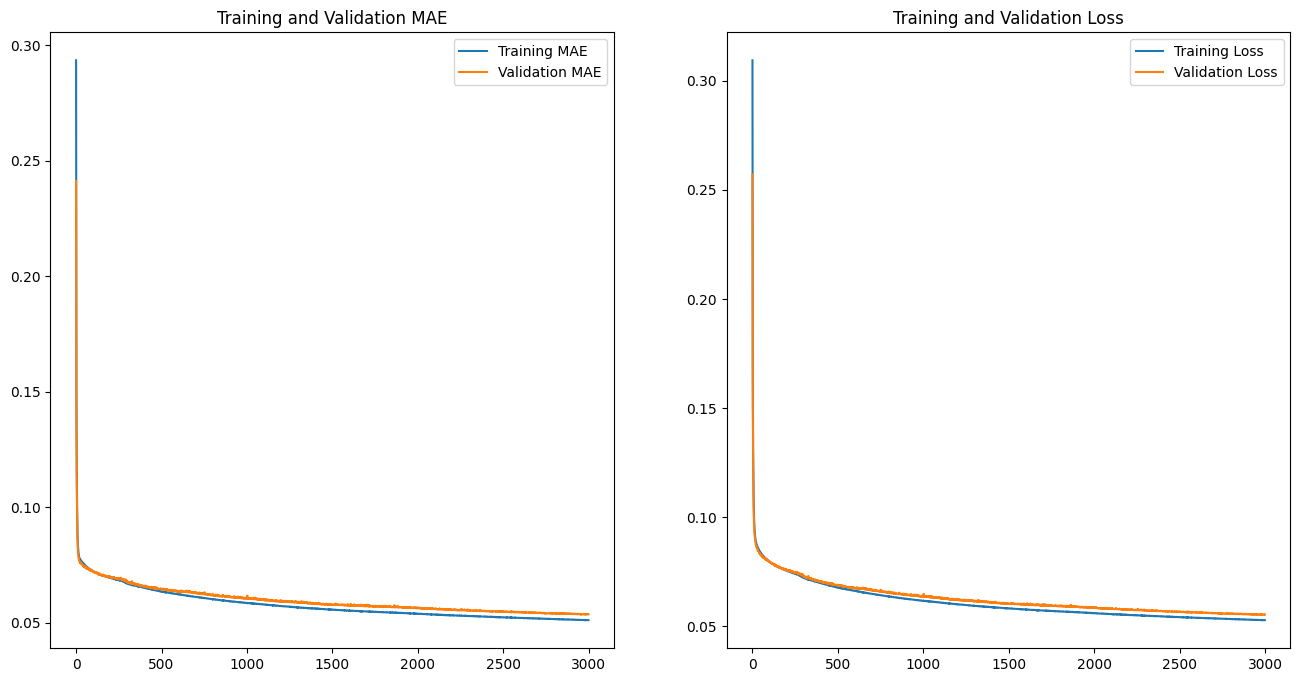

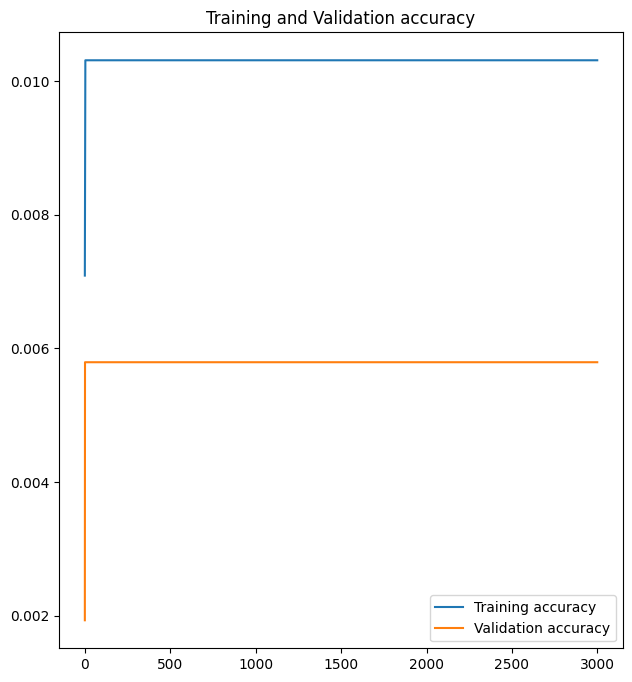

In [ ]:
mae = history.history['MAE']
val_mae = history.history['val_MAE']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(3000)
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, mae, label='Training MAE')
plt.plot(epochs_range, val_mae, label='Validation MAE')
plt.legend(loc='upper right')
plt.title('Training and Validation MAE')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training accuracy')
plt.plot(epochs_range, val_acc, label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation accuracy')


plt.show()

In [ ]:
y_pred = modelo.predict(x_test).flatten()

17/17 [==============================] - 0s 1ms/step


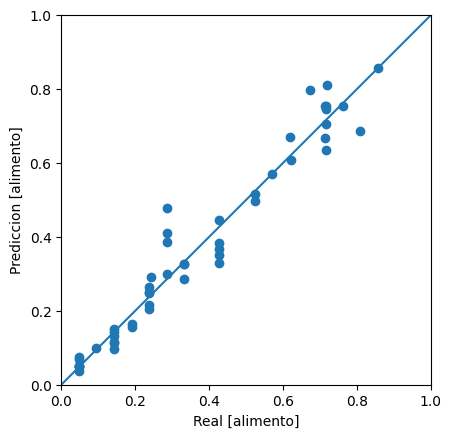

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(y_test[0:50], y_pred[0:50])
plt.xlabel('Real [alimento]')
plt.ylabel('Prediccion [alimento]')
lims = [0,1]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

In [ ]:
xtest_ytest_df = pd.concat([x_test, y_test], axis=1)
xtest_ytest_df

,Estanque,Hectareas,tC_am,O2_am,Biomasa,Dias_cultivo,Dia_anio,Total
1113,0.434783,1.0,0.619835,0.396552,0.606490,0.522222,0.522222,0.570396
82,0.478261,1.0,0.256198,0.775862,0.023366,0.033333,0.033333,0.047533
1273,0.173913,0.5,0.694215,0.534483,0.435500,0.600000,0.600000,0.712996
1994,0.782609,0.5,0.818182,0.327586,0.865231,0.966667,0.966667,0.716836
208,0.739130,0.5,0.223140,0.827586,0.084381,0.088889,0.088889,0.047533
...,...,...,...,...,...,...,...,...
32,0.347826,0.5,0.115702,0.758621,0.020967,0.011111,0.011111,0.047533
111,0.695652,0.5,0.330579,0.724138,0.002856,0.044444,0.044444,0.047533
1000,0.695652,0.5,0.599174,0.431034,0.434358,0.466667,0.466667,0.475330
1495,0.478261,1.0,0.776860,0.482759,0.840494,0.722222,0.722222,0.764236


In [ ]:
y_pred_array = np.array(y_pred)
xtest_ypred_df = x_test.copy()
xtest_ypred_df['Total_Pred'] = y_pred_array
xtest_ypred_df

,Estanque,Hectareas,tC_am,O2_am,Biomasa,Dias_cultivo,Dia_anio,Total_Pred
1113,0.434783,1.0,0.619835,0.396552,0.606490,0.522222,0.522222,0.568905
82,0.478261,1.0,0.256198,0.775862,0.023366,0.033333,0.033333,0.035916
1273,0.173913,0.5,0.694215,0.534483,0.435500,0.600000,0.600000,0.755309
1994,0.782609,0.5,0.818182,0.327586,0.865231,0.966667,0.966667,0.634120
208,0.739130,0.5,0.223140,0.827586,0.084381,0.088889,0.088889,0.073924
...,...,...,...,...,...,...,...,...
32,0.347826,0.5,0.115702,0.758621,0.020967,0.011111,0.011111,0.047362
111,0.695652,0.5,0.330579,0.724138,0.002856,0.044444,0.044444,0.046190
1000,0.695652,0.5,0.599174,0.431034,0.434358,0.466667,0.466667,0.434244
1495,0.478261,1.0,0.776860,0.482759,0.840494,0.722222,0.722222,0.767141


In [ ]:
xt_yp_array = np.array(xtest_ypred_df)
xt_yt_array = np.array(xtest_ytest_df)

In [ ]:
y_pred_it = scaler.inverse_transform(xt_yp_array)
y_test_it = scaler.inverse_transform(xt_yt_array)

In [ ]:
ypred_itdf = pd.DataFrame(y_pred_it)
#1 ypred_itdf.columns=['Estanque', 'Hectareas', 'tC_am', 'tC_pm','O2_am', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']
ypred_itdf.columns=['Estanque', 'Hectareas', 'tC_am','O2_am', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']
#3 ypred_itdf.columns=['Estanque', 'Hectareas', 'tC_pm', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']
#4 ypred_itdf.columns=['Estanque', 'Hectareas', 'tC_am', 'O2_am', 'Dias_cultivo', 'Dia_anio', 'Total']
#5 ypred_itdf.columns=['Estanque', 'Hectareas', 'tC_pm', 'O2_pm', 'Dias_cultivo', 'Dia_anio', 'Total']
#6 ypred_itdf.columns=['Estanque', 'Hectareas', 'tC_am', 'tC_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']
#7 ypred_itdf.columns=['Estanque', 'Hectareas', 'tC_am', 'tC_pm', 'Dias_cultivo', 'Dia_anio', 'Total']

#8 ypred_itdf.columns=['Estanque', 'Hectareas', 'tC_am', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']

#9 ypred_itdf.columns=['Estanque', 'Hectareas', 'tC_am', 'Dias_cultivo', 'Dia_anio', 'Total']
#10 ypred_itdf.columns=['Estanque', 'Hectareas', 'tC_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']
#11 ypred_itdf.columns=['Estanque', 'Hectareas', 'tC_pm', 'Dias_cultivo', 'Dia_anio', 'Total']
#12 ypred_itdf.columns=['Estanque', 'Hectareas', 'O2_am', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']
#13 ypred_itdf.columns=['Estanque', 'Hectareas', 'O2_am', 'O2_pm', 'Dias_cultivo', 'Dia_anio', 'Total']
#14 ypred_itdf.columns=['Estanque', 'Hectareas', 'O2_am', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']
#15 ypred_itdf.columns=['Estanque', 'Hectareas', 'O2_am', 'Dias_cultivo', 'Dia_anio', 'Total']
#16 ypred_itdf.columns=['Estanque', 'Hectareas', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']
#17 ypred_itdf.columns=['Estanque', 'Hectareas', 'O2_pm', 'Dias_cultivo', 'Dia_anio', 'Total']
#18 ypred_itdf.columns=['Estanque', 'Hectareas', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']
#19 ypred_itdf.columns=['Estanque', 'Hectareas', 'Dias_cultivo', 'Dia_anio', 'Total']



ypred_itdf

,Estanque,Hectareas,tC_am,O2_am,Biomasa,Dias_cultivo,Dia_anio,Total
0,11.0,7.0,27.60,2.9,10813.0,65.0,161.0,349.215489
1,12.0,7.0,23.20,5.1,606.0,21.0,117.0,68.889895
2,5.0,6.0,28.50,3.7,7820.0,72.0,168.0,447.254604
3,19.0,6.0,30.00,2.5,15342.0,105.0,201.0,383.515564
4,18.0,6.0,22.80,5.4,1674.0,26.0,122.0,88.880080
...,...,...,...,...,...,...,...,...
513,9.0,6.0,21.50,5.0,564.0,19.0,115.0,74.909864
514,17.0,6.0,24.10,4.8,247.0,22.0,118.0,74.293864
515,17.0,6.0,27.35,3.1,7800.0,60.0,156.0,278.390369
516,12.0,7.0,29.50,3.4,14909.0,83.0,179.0,453.477926


In [ ]:
ytest_itdf = pd.DataFrame(y_test_it)
#1 ytest_itdf.columns=['Estanque', 'Hectareas', 'tC_am', 'tC_pm','O2_am', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']
ytest_itdf.columns=['Estanque', 'Hectareas', 'tC_am','O2_am', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']
#3 ytest_itdf.columns=['Estanque', 'Hectareas', 'tC_pm', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']
#4 ytest_itdf.columns=['Estanque', 'Hectareas', 'tC_am', 'O2_am', 'Dias_cultivo', 'Dia_anio', 'Total']
#5 ytest_itdf.columns=['Estanque', 'Hectareas', 'tC_pm', 'O2_pm', 'Dias_cultivo', 'Dia_anio', 'Total']
#6 ytest_itdf.columns=['Estanque', 'Hectareas', 'tC_am', 'tC_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']
#7 ytest_itdf.columns=['Estanque', 'Hectareas', 'tC_am', 'tC_pm', 'Dias_cultivo', 'Dia_anio', 'Total']

#8 ytest_itdf.columns=['Estanque', 'Hectareas', 'tC_am', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']

#9 ytest_itdf.columns=['Estanque', 'Hectareas', 'tC_am', 'Dias_cultivo', 'Dia_anio', 'Total']
#10 ytest_itdf.columns=['Estanque', 'Hectareas', 'tC_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']
#11 ytest_itdf.columns=['Estanque', 'Hectareas', 'tC_pm', 'Dias_cultivo', 'Dia_anio', 'Total']
#12 ytest_itdf.columns=['Estanque', 'Hectareas', 'O2_am', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']
#13 ytest_itdf.columns=['Estanque', 'Hectareas', 'O2_am', 'O2_pm', 'Dias_cultivo', 'Dia_anio', 'Total']
#14 ytest_itdf.columns=['Estanque', 'Hectareas', 'O2_am', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']
#15 ytest_itdf.columns=['Estanque', 'Hectareas', 'O2_am', 'Dias_cultivo', 'Dia_anio', 'Total']
#16 ytest_itdf.columns=['Estanque', 'Hectareas', 'O2_pm', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']
#17 ytest_itdf.columns=['Estanque', 'Hectareas', 'O2_pm', 'Dias_cultivo', 'Dia_anio', 'Total']
#18 ytest_itdf.columns=['Estanque', 'Hectareas', 'Biomasa', 'Dias_cultivo', 'Dia_anio', 'Total']
#19 ytest_itdf.columns=['Estanque', 'Hectareas', 'Dias_cultivo', 'Dia_anio', 'Total']


ytest_itdf

,Estanque,Hectareas,tC_am,O2_am,Biomasa,Dias_cultivo,Dia_anio,Total
0,11.0,7.0,27.60,2.9,10813.0,65.0,161.0,350.00
1,12.0,7.0,23.20,5.1,606.0,21.0,117.0,75.00
2,5.0,6.0,28.50,3.7,7820.0,72.0,168.0,425.00
3,19.0,6.0,30.00,2.5,15342.0,105.0,201.0,427.02
4,18.0,6.0,22.80,5.4,1674.0,26.0,122.0,75.00
...,...,...,...,...,...,...,...,...
513,9.0,6.0,21.50,5.0,564.0,19.0,115.0,75.00
514,17.0,6.0,24.10,4.8,247.0,22.0,118.0,75.00
515,17.0,6.0,27.35,3.1,7800.0,60.0,156.0,300.00
516,12.0,7.0,29.50,3.4,14909.0,83.0,179.0,451.95


In [ ]:
mae = tf.keras.losses.MeanAbsoluteError()
mae(ytest_itdf['Total'], ypred_itdf['Total']).numpy()

28.191873921929318

In [ ]:
r2_score(ytest_itdf['Total'], ypred_itdf['Total'])

0.9202283918988832

In [ ]:
import joblib
joblib.dump(modelo, 'intento1.pkl')

['intento1.pkl']